In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from scipy.optimize import bisect
from fompy.constants import eV, me
from fompy.units import unit
from fompy.models import KronigPenneyModel
from fompy.util.zeros import find_nth_function_zero

In [2]:
# Periodic potential:
# U = U0, n*(a+b) < x < n*(a+b) + a
# U = 0,  n*(a+b) + a <= (n+1)*(a + b)
# предполагаем, что a - барьер, b - межбарьерное расстояние

In [3]:
def find_band_range(model, m, E0): # Ищет зону чуть ниже вершины барьера
    xtol_coarse = abs(model.u0)/1e5
    xtol_fine = abs(model.u0)/1e7
    
    def f(energy):
        return model.equation_left_part(energy, m) - 1
    e_start = find_nth_function_zero(f, E0, xtol_coarse, xtol_fine, num=-1)
    
    def f(energy):
        return model.equation_left_part(energy, m) + 1
    e_end = find_nth_function_zero(f, e_start, xtol_coarse, xtol_fine, num=0)
    
    return e_start, e_end

E_min, eV =  0.5175598734375001
E_max, eV =  0.5184961656250001


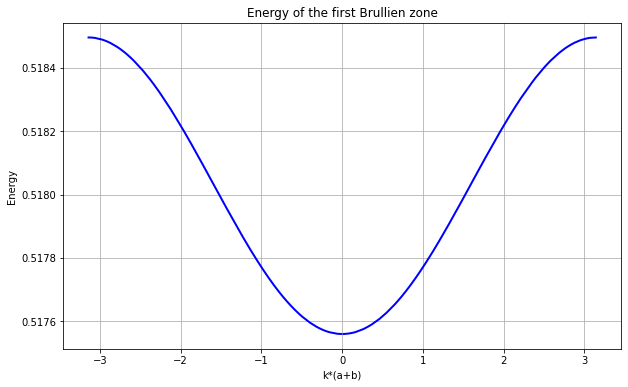

In [4]:
def filter_gaps(ks, es):
    _es = []
    _ks = []
    for e, k in zip(es, ks):
        if e is not None:
            _es.append(e)
            _ks.append(k)
    return np.array(_ks), np.array(_es)

def main():
    @np.vectorize
    def get_energy(k):
        try:
            return model.get_energy(k, m, (e_start, e_end), accuracy)
        except ValueError:
            return None
    
    m = 0.49 * me
    a = 5 * unit('nm')
    b = 10 * unit('nm')
    U_0 = 0.58 * eV

    model = KronigPenneyModel(a, b, U_0)

    E_0 = model.u0*(1 - 1/100) # first non-zero approximation
    accuracy = abs(model.u0)/10000000     # accuracy with to find E_start, E_end

    e_start, e_end = find_band_range(model, m, E_0)
    print("E_min, eV = ", e_start/eV)
    print("E_max, eV = ", e_end/eV)
    
    kas = np.linspace(-pi, pi, 1000)
    es = get_energy(kas/model.period)
    kas, es = filter_gaps(kas, es)

    plt.plot(kas, es/eV, lw = 2, color = 'b', alpha = 1)
    plt.xlabel("k*(a+b)")
    plt.ylabel("Energy")
    plt.title("Energy of the first Brullien zone")
    plt.grid()
    plt.gcf().set_size_inches(10, 6)
    plt.show()

main()